# Homework 8: Logistic Regression

**Due**: Monday June 5th.

- **Format**: We expect students to complete the homework notebooks using Google Colab (see Discussion 1), but this is not explicitly required and you may use whatever software you would like to run notebooks. 
- **Answers**: As a general guiding policy, you should always try to make it as clear as possible what your answer to each question is, and how you arrived at your answer. Generally speaking, this will mean including all code used to generate results, outputting the actual results to the notebook, and (when necessary) including written answers to support your code.
- **Submission**: Homeworks will be *submitted to Gradescope*, and we expect all students to do question matching on Gradescope upon submission.
- **Late Policy**: All students are allowed 7 total slip days for the quarter, and at most 5 can be used for a single HW assignment. There will be no late credit if you have used up all your slip days. Also, your lowest HW grade will be dropped.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set_theme()

## Question 1: Classification Metrics

Consider the following confusion matrix, which compares the predictions and actual labels in a classification problem of predicting whether or not a person has covid-19.

Text(0.5, 1.0, 'Confusion Matrix for Covid Test')

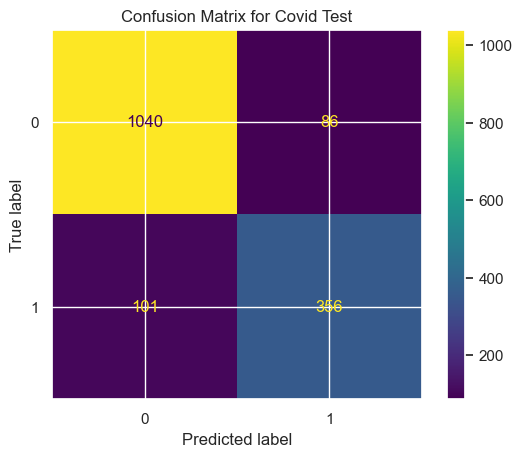

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix=np.array([[1040, 86], [101, 356]]))
cm.plot()
plt.title("Confusion Matrix for Covid Test")

**Part (a)**: Calculate the accuracy, precision, recall, and F1 score for the above classifier. You must calculate these metrics manually, without using functions available in various packages. For each metric, explain what the metric is measuring in the context of the problem.

In [5]:
# Calculate accuracy
accuracy = (1040 + 356) / (1040 + 86 + 101 + 356)
print(accuracy)

# Calculate precision
precision = 356 / (356 + 86)
print(precision)

# Calculate recall
recall = 356 / (356 + 101)
print(recall)

# Calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)
print(f1)

0.8818698673404928
0.8054298642533937
0.7789934354485777
0.7919911012235819


- **Accuracy**: The percent of all people that tested that are corrected identified to have or not have covid.
- **Precision**: Out of all people predicted to have covid, what percent actually have covid?
- **Recall**: Out of all people who actually have covid, what percent are predicted correctly to have covid?
- **F1**: The harmonic mean of the precision and recall as defined above. In a sense, this gives an average of how precise the covid test is at predicting covid without over-predicting covid, and how well it can detect covid without leaving many cases undetected.

**Part (b)**: For each of the following classification problems, determine whether or not you think a false negative error or a false positive error is worse, or if the errors are comparable. Provide justification for your answer (there may be more than 1 correct answer depending on your justification).

- A model that predicts whether (True) or not (False) a vaccine should be given to a person. Assume the vaccine generally has very minor side effects.
- A model that predicts whether (True) or not (False) an email is spam and should thus be filtered. 
- A model that predictis whether (True) or not (False) a bank transaction should be marked as potentially fraudulent, and thus reviewed by the account owner.

*Answer*: 
- A false negative is very bad, because this means a vaccine was not given to a person who actually needed it. Whereas a false positive is not very bad, because a person getting a vaccine that doesn't actually need it is not very harmful. Thus, a false negative is worse.
- A false negative means that an email is not detected as spam, when it actually is. Generally this is not very bad, although can be bad if it becomes too excessive. A false positive meanwhile means that a non-spam email is flagged spam. This can be very bad if it is actually an important email that is thus never read. Thus, I would argue that a false positive is worse.
- A false negative means that a fraudulent transcation is not marked as fraud, which is very bad. A false positive means a normal transcation is marked as fraud, which is not very bad, because the account holder should be able to easily verify that the transaction is valid. Thus a false negative is worse.

## Question 2: Weather Data

You decide to try to build your own model to predict weather it will rain tomorrow based on historical data. You use the following data to build your model.

In [3]:
weather_df = pd.read_csv("https://raw.githubusercontent.com/stanford-mse-125/homework/main/data/weather.csv")
weather_df = weather_df.dropna().reset_index(drop=True)
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
56416,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
56417,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
56418,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


**Part (a)**: Build a logistic regression model to predict `RainTomorrow` from `MinTemp` and `MaxTemp` as well as `Rainfall` from the current day. Interpret the coefficient for `RainFall` in the context of the problem.

In [8]:
# Make binary variable for outcome
weather_df["y"] = np.where(weather_df["RainTomorrow"] == "Yes", 1, 0)

# Fit logistic regression model using statsmodels
model = smf.logit("y ~ MinTemp + MaxTemp + Rainfall", data=weather_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.450694
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                56420
Model:                          Logit   Df Residuals:                    56416
Method:                           MLE   Df Model:                            3
Date:                Tue, 30 May 2023   Pseudo R-squ.:                  0.1452
Time:                        13:31:15   Log-Likelihood:                -25428.
converged:                       True   LL-Null:                       -29747.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5482      0.043     12.785      0.000       0.464       0.632
MinTemp        0.1969      0.003     59.901      0.000       0.190       0.203
MaxTemp       -0.2006      0.003    -63.767      0.000      -0.207      -0.194
Rainfall       0.0561      0.002     31.647      0.000       0.053       0.060
==============================================================================
"""

The coefficient for Rainfall is about 0.06. This means that for each additional unit of rain today, and log odds of whether or not it will rain tomorrow increases by 0.06, keeping MaxTemp and MinTemp constant.

**Part (b)**: You really hate when you expect it not to rain and then it actually does. Specifically, you decide that a false negative error, i.e. predicting it won't rain when it does, is 3 times worse than a false positive, i.e. predicting it will rain when it doesn't. Use the ROC curve to find the *optimal threshold* for this setting using the gives costs for false positive and false negatives. 

As a guide, you should:
1) Fix a thresold $t$.
2) Compute model predictions using the given threshold $t$.
3) Compute the false positive rate (fpr) and the false negative rate (fnr) using the predictions from 2).
4) Compute the *cost* of the threshold as $1 \cdot fpr  + 3 \cdot fnr$.
5) Repeat 1) - 4) for many thresholds $t \in [0, 1]$, and find the threshold that minimizes the cost.

Output the optimal threshold, as well as a plot which compares threshold vs cost.

0.07163636363636364


<Axes: xlabel='threshold', ylabel='cost'>

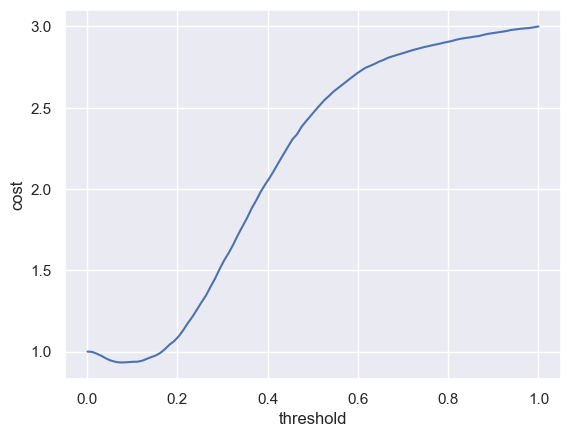

In [9]:
from sklearn.metrics import confusion_matrix
thresholds = np.linspace(0.001, 1, 100)
costs = []
for threshold in thresholds:
    # Compute predictions
    y_pred = model.predict(weather_df) >= threshold

    # Compute confusion matrix
    cm = confusion_matrix(weather_df["y"], y_pred)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    cost = fpr + 3 * fnr
    costs.append(cost)

opt_threshold = thresholds[np.argmin(costs)]
print(opt_threshold)
df = pd.DataFrame({"threshold": thresholds, "cost": costs})
sns.lineplot(data=df, x="threshold", y="cost")

0.0790158394356018


<Axes: xlabel='threshold', ylabel='cost'>

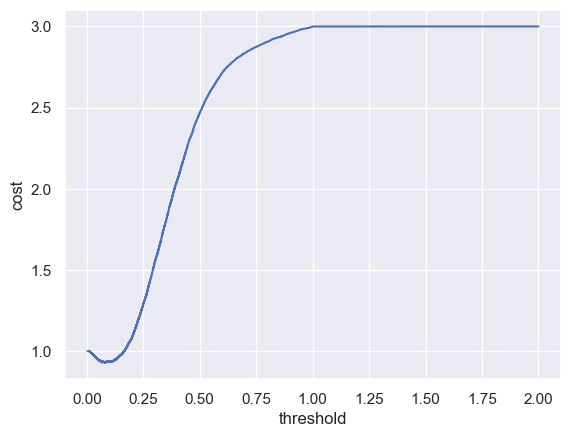

In [10]:
# Also can use sklearn's roc_curve function
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(weather_df["y"], model.predict(weather_df))
costs = fpr + 3 * (1 - tpr)
opt_threshold = thresholds[np.argmin(costs)]
print(opt_threshold)
df = pd.DataFrame({"threshold": thresholds, "cost": costs})
sns.lineplot(data=df, x="threshold", y="cost")

**Part (c)**: One metric that is used sometimes when false negatives and false positives have different costs is the [F-beta score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html#:~:text=Compute%20the%20F%2Dbeta%20score,recall%20in%20the%20combined%20score.), which generalizes the F1 score. Using $\beta = 3$ and the optimal threshold determined in part (b), find the out-of-sample F-beta score using 5-fold cross validation for the given model.

In [63]:
from sklearn.metrics import fbeta_score

# Using statsmodels
folds = np.array_split(weather_df, 5)
score_list = []
for i in range(5):
    val_df = folds[i]
    train_df = pd.concat(folds[:i] + folds[i+1:])
    model = smf.logit("y ~ MinTemp + MaxTemp + Rainfall", data=weather_df).fit()
    
    # use sklearn to calculate fbeta score
    y_pred = model.predict(val_df) >= opt_threshold

    score = fbeta_score(val_df["y"], y_pred, beta=3)
    score_list.append(score)

np.mean(score_list)

Optimization terminated successfully.
         Current function value: 0.450694
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.450694
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.450694
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.450694
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.450694
         Iterations 6


0.7452029675834287

In [62]:
# Alternative solution using sklearn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer

def custom_fbeta_score(y, y_pred, **kwargs):
    return fbeta_score(y, y_pred >= opt_threshold, beta=3)
scorer = make_scorer(custom_fbeta_score, needs_proba=True)

model = LogisticRegression(penalty=None)
np.mean(cross_val_score(model, weather_df[["MinTemp", "MaxTemp", "Rainfall"]], weather_df["y"], scoring=scorer, cv=5))

0.7445503635948103